In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os

# Define the path to your local folder containing the .wav files
local_folder_path = '/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data'

paths = []
labels = []

for dirname, _, filenames in os.walk(local_folder_path):
    for filename in filenames:
        if filename.endswith('.wav'):  # Ensure to only process .wav files
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())

print('Dataset is Loaded')
print(f'Total files loaded: {len(paths)}')


Dataset is Loaded
Total files loaded: 5600


In [7]:
len(paths)

5600

In [8]:
paths[:5]

['/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav',
 '/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data/YAF_disgust/YAF_rag_disgust.wav',
 '/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data/YAF_disgust/YAF_raise_disgust.wav',
 '/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data/YAF_disgust/YAF_ditch_disgust.wav',
 '/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav']

In [9]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/Users/simantinighosh/Desktop/Eitacies_project...,disgust
1,/Users/simantinighosh/Desktop/Eitacies_project...,disgust
2,/Users/simantinighosh/Desktop/Eitacies_project...,disgust
3,/Users/simantinighosh/Desktop/Eitacies_project...,disgust
4,/Users/simantinighosh/Desktop/Eitacies_project...,disgust


In [11]:
df['label'].value_counts()

disgust    800
ps         800
happy      800
sad        800
neutral    800
fear       800
angry      800
Name: label, dtype: int64

# EDA

<Axes: xlabel='label', ylabel='count'>

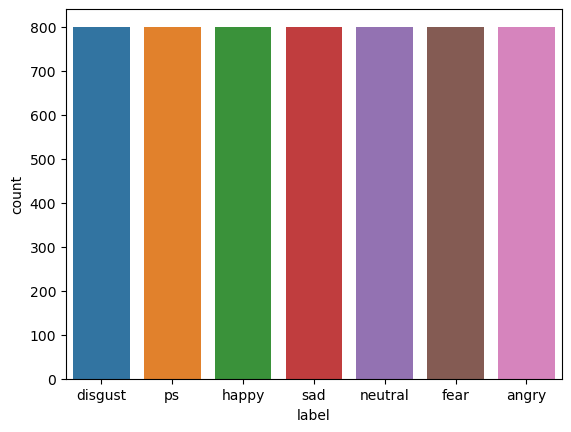

In [12]:
sns.countplot(data=df, x='label')

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

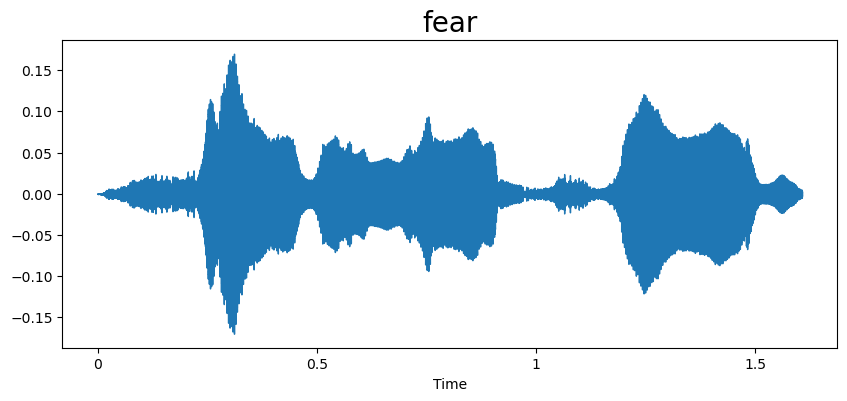

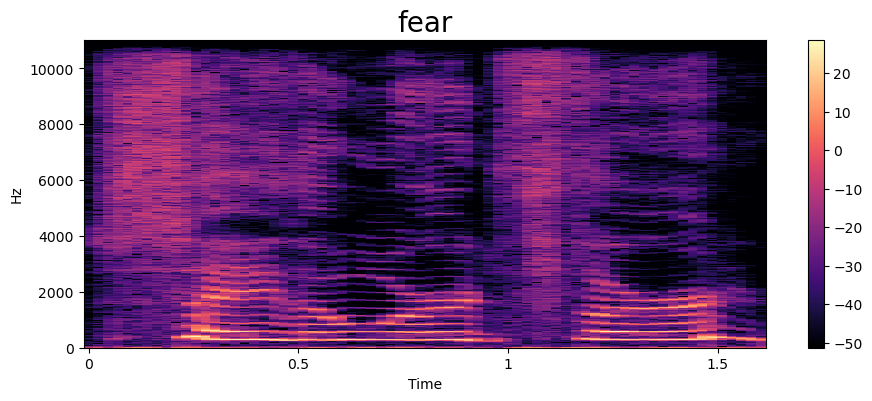

In [14]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

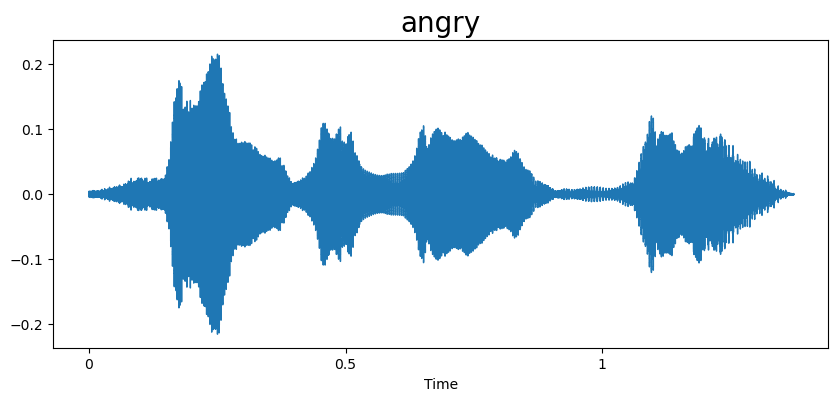

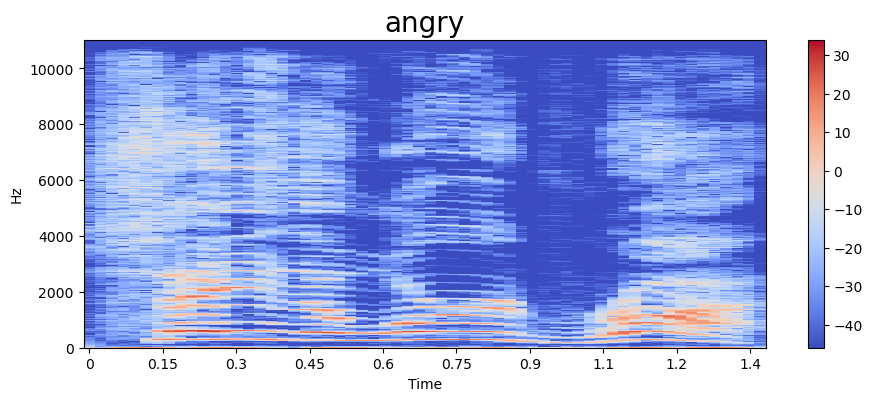

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-4.4636795e+02,  7.3789307e+01,  1.5521693e+00,  4.0626900e+01,
       -8.4494514e+00, -2.9341414e+00, -6.6822000e+00, -1.7199314e+01,
       -5.6114135e+00, -1.3409514e+01, -7.3893251e+00,  6.8370895e+00,
       -1.0458899e+01,  3.2033212e+00, -1.0037674e+00, -5.6148562e+00,
        4.2504158e+00, -1.1169615e+00, -9.1154394e+00,  2.1831026e+00,
       -7.7419305e+00,  6.4608276e-01, -3.6939988e+00,  3.7297693e-01,
       -2.0016901e+00, -1.8217640e+00, -2.7837274e+00,  2.8430920e+00,
       -3.0322762e+00,  4.5028725e+00, -8.8744307e-01,  4.2168245e+00,
        1.7408369e+00,  3.8251708e+00,  4.3130198e+00,  3.1095665e+00,
        3.5192721e+00,  4.1317425e+00,  2.2578521e+00,  2.3055410e+00],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc

0       [-446.36795, 73.78931, 1.5521693, 40.6269, -8....
1       [-383.37564, 108.15568, -17.578178, 15.888102,...
2       [-404.0382, 87.21107, 0.48701447, 22.224407, -...
3       [-444.80597, 67.52622, -3.8089027, 31.318571, ...
4       [-430.42755, 118.75985, 6.9652753, 5.20493, -8...
                              ...                        
5595    [-574.7826, 95.66921, 34.851234, 16.821646, 17...
5596    [-557.9271, 89.87658, 33.66148, 15.339763, 22....
5597    [-527.0877, 115.282486, 26.172384, 7.626841, 1...
5598    [-560.78094, 121.28373, 40.30248, -1.9568887, ...
5599    [-552.68384, 106.72334, 35.172703, 8.06072, 22...
Name: speech, Length: 5600, dtype: object

In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [21]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y = y.toarray()

In [24]:
y.shape

(5600, 7)

# Model LSTM

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4862 - loss: 1.2795 - val_accuracy: 0.8920 - val_loss: 0.3006
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9277 - loss: 0.2372 - val_accuracy: 0.9518 - val_loss: 0.1322
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9567 - loss: 0.1348 - val_accuracy: 0.9607 - val_loss: 0.1230
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9655 - loss: 0.1087 - val_accuracy: 0.9616 - val_loss: 0.1096
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9677 - loss: 0.1097 - val_accuracy: 0.9705 - val_loss: 0.0843
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9782 - loss: 0.0677 - val_accuracy: 0.9705 - val_loss: 0.0801
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9824 - loss: 0.0625 - val_accuracy: 0.9571 - val_loss: 0.1225
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9845 - loss: 0.0638 - val_accuracy: 0.9777 - v

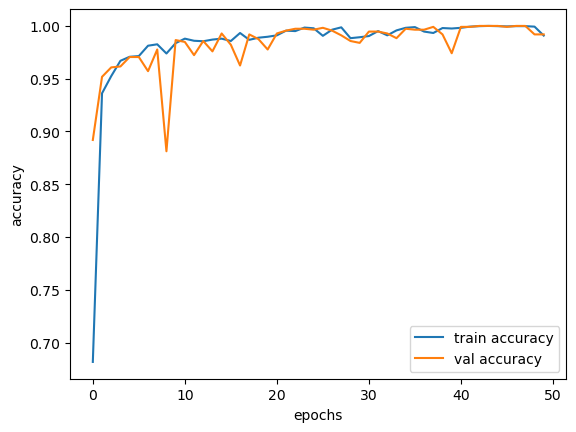

In [27]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

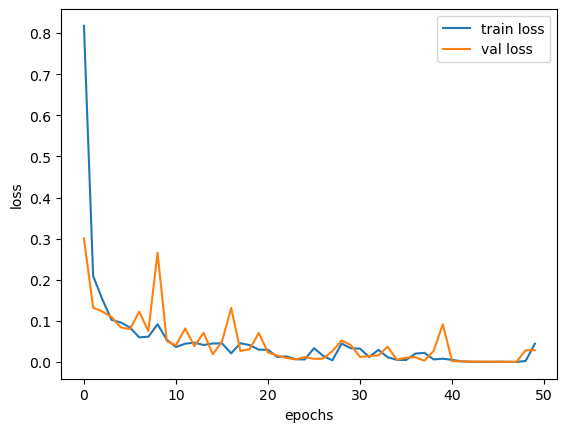

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
pip install SpeechRecognition


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import speech_recognition as sr
import json
import numpy as np
import librosa

In [36]:


def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def convert_audio_to_text(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio_data = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio_data)
        except sr.UnknownValueError:
            text = "Could not understand the audio"
        except sr.RequestError as e:
            text = f"Could not request results from the speech recognition service; {e}"
    return text

def predict_audio(audio_path):
    # Convert audio to text
    audio_transcript = convert_audio_to_text(audio_path)
    
    # Extract MFCC features and predict emotion
    mfcc = extract_mfcc(audio_path)
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.expand_dims(mfcc, axis=-1)
    prediction = model.predict(mfcc)
    predicted_label = enc.inverse_transform(prediction)[0][0]
    
    # Prepare the prediction message
    prediction_msg = f'The predicted emotion for the audio file is "{predicted_label}".'
    
    # Create the result dictionary
    result = {
        "Audio Transcript": audio_transcript,
        "Prediction": prediction_msg
    }
    
    # Define the output JSON file path
    json_file_path = 'exp.json'
    
    # Write the result to a JSON file
    with open(json_file_path, 'w') as json_file:
        json.dump(result, json_file, indent=4)
    
    print(f'Prediction result saved to {json_file_path}')
    return result

# Example usage
audio_path = '/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/TESS Toronto emotional speech set data/YAF_happy/YAF_burn_happy.wav'
result = predict_audio(audio_path)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction result saved to exp.json
{'Audio Transcript': 'say the word', 'Prediction': 'The predicted emotion for the audio file is "happy".'}


In [37]:
from pymongo import MongoClient
import json

def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    # Create a MongoDB client
    client = MongoClient(mongo_uri)

    # Access the database
    db = client[db_name]

    # Access the collection
    collection = db[collection_name]

    # Open the JSON file and load its contents
    with open(json_file_path, 'r') as file:
        data = json.load(file)

        # If the JSON file contains an array of documents
        if isinstance(data, list):
            collection.insert_many(data)
        else:
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")


json_file_path = r'/Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/exp.json'  
db_name = 'Expression_detection'
collection_name = 'exp_det'

load_json_to_mongodb(json_file_path, db_name, collection_name)

Data from /Users/simantinighosh/Desktop/Eitacies_projects/Expression_detection/exp.json has been successfully imported into the Expression_detection.exp_det collection.
